In [1]:
# save your token to your ibm_quantum account
"""QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="ee8307bf15828b52bfccbb96227b8bff3e08f3d8cab98ed7cdcb6305c79711224e5b1e1b3e045bfb1cc7d9aca3d4769e0a6e2ede465037821c42a0ab6632958f"
)"""

'QiskitRuntimeService.save_account(\n    channel="ibm_quantum",\n    token="ee8307bf15828b52bfccbb96227b8bff3e08f3d8cab98ed7cdcb6305c79711224e5b1e1b3e045bfb1cc7d9aca3d4769e0a6e2ede465037821c42a0ab6632958f"\n)'

In [3]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [4]:
from current_circuit import *

In [5]:
#configure your service
service = QiskitRuntimeService()

In [5]:
#list all available backends
"""available_backends = service.backends()
available_backends"""

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [6]:
#create a list with the names of the available backends
"""list_of_backends = []
for backend in available_backends:
    backend_name = str(backend)
    backend_name = backend_name.replace("<IBMBackend('","")
    backend_name = backend_name.replace("')>","")
    list_of_backends.append(backend_name)
"""

In [7]:
"""list_of_backends"""

['ibm_brisbane', 'ibm_kyiv', 'ibm_sherbrooke']

In [11]:
#select your backend
"""print("Select your backend: ")
backend_index = input()
backend_name = list_of_backends[int(backend_index)]
backend = service.backend(backend_name)"""

Select your backend: 


In [14]:
#defines the quantum circuit
quantum_circuit = current_circuit()
qc = quantum_circuit.get_current_circuit()
num_of_qbits = quantum_circuit.get_num_of_qbits()

In [15]:
#transpile your circuit
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=num_of_qbits)
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = pass_manager.run(qc)
sampler = Sampler(backend)

In [17]:
#run your circuit with samples
job = sampler.run([qc_transpiled])
result = job.result()

{'1011000111': 300, '0111110111': 257, '1111001111': 132, '1111110111': 215, '0011001111': 185, '1111111111': 121, '0111001111': 141, '0011000111': 302, '0111111111': 184, '0111111011': 8, '1011111111': 134, '1111000111': 228, '1011110111': 227, '1101111111': 18, '0111000111': 288, '0101111111': 15, '1101000111': 20, '0011111011': 9, '0011111111': 192, '0011110111': 268, '0001110111': 23, '0011000011': 13, '1011001111': 180, '1010110111': 5, '0111111101': 4, '0001000111': 47, '1011000011': 15, '0111001110': 4, '0011010111': 8, '1101001111': 15, '1001001111': 15, '0001001111': 21, '0110111111': 6, '0101001111': 15, '1111000011': 7, '1110001111': 4, '0101000111': 29, '0111001011': 12, '0001011111': 3, '1011111110': 1, '1001111111': 13, '0010000111': 11, '1001000111': 28, '1110000111': 8, '0010111111': 3, '0110110111': 7, '0101001011': 3, '0100110111': 3, '1101110111': 12, '0011011111': 11, '0111011111': 6, '0001010111': 2, '0101110111': 28, '0111000011': 11, '0001111111': 14, '0010001111

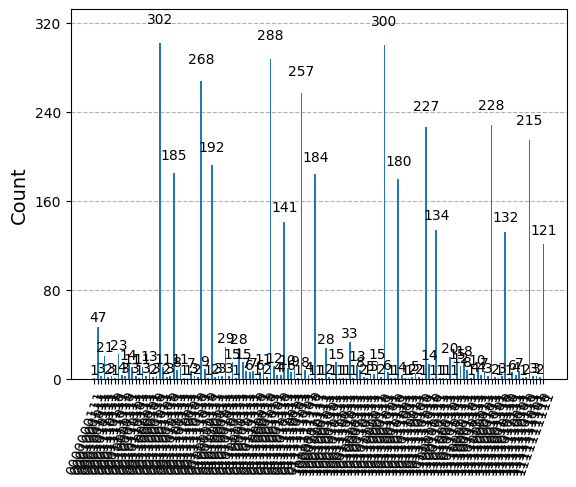

In [28]:
#plot your histogram with results
counts = result[0].data.c.get_counts()
print(counts)
plot_histogram(counts)